<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/dl_master/dl_master_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Master node 5-8

### 목차

5. 모델 저장과 콜백

6. 모델 학습 기술

7. 모델 크기 조절과 규제

8. 가중치 초기화와 배치 정규화

## 5. 모델 저장과 콜백

**학습 목표**

* 딥러닝 모델을 저장하고 복원하는 방법에 대해서 설명할 수 있습니다.
* 모델 학습 시에 사용할 수 있는 콜백 함수에 대해 설명할 수 있습니다.

**모듈 임포트**

딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트하고, 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils를 임포트합니다.  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

**데이터 로드 및 전처리**

이제 우리가 사용할 MNIST 데이터셋을 로드하기 위해서 케라스의 데이터셋에 내장되어 있는 tensorflow.keras.datasets.mnist를 임포트합니다. 그리고 train_test_split() 함수를 이용해 학습용 데이터인 x_train_full와 y_train_full를 나누어서 70%는 학습용 데이터인 x_train와 y_train으로 사용하고, 30%는 검증 데이터인 x_val와 y_val로 사용합니다. 데이터셋이 어떻게 구성되었는지 출력해보면, 전체 60,000개의 학습 데이터 중에서 70%인 42,000개가 학습용 데이터로 나눠지고, 30%인 18,000개가 검증용 데이터로 나눠졌으며, 테스트용으로는 10,000개가 주어진 것을 알 수 있습니다.

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

11501568/11490434 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


MNIST 데이터셋에 실제 숫자 이미지가 어떻게 구성되어 있는지 60,000개 중에서 6개만 랜덤으로 x_train_full과 y_train_full에서 추출하여 표시해보도록 하겠습니다.

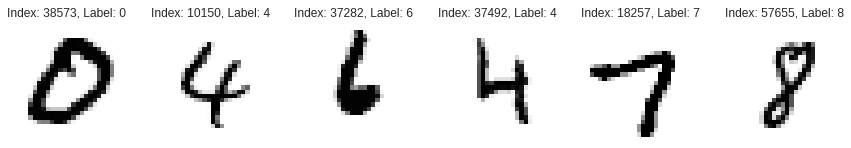

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

MNIST의 학습용 데이터가 실제 값으로는 어떻게 구성되어있는지 출력을 해보면, y_train의 0번째는 4라는 값이 저장되어 있는걸 알 수 있고, x_train의 0번째에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현하고 있음을 알 수 있습니다.

In [ ]:
print(y_train[0])

4


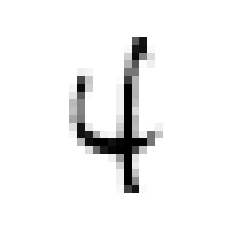

In [ ]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

MNIST 데이터셋을 가지고 본격적으로 딥러닝 모델에 사용하기 위해서는 전처리 과정이 필요합니다. 본 예제에서는 간단한 전처리만 사용해서 x_train, x_val 그리고 x_test의 값들을 255로 나누어줍니다. 이미지의 픽셀이 표현하는 값의 범위가 0 ~ 255이기 때문에 최대값인 255로 나누어주면, 값이 0 ~ 1 사이의 범위로 스케일링되어 학습에 용이해집니다. y_train, y_val, 그리고 y_test의 경우에는 0부터 9까지의 숫자를 나타내는 레이블이기 때문에 총 10개의 값을 가지는 범주형입니다. 따라서 utils.to_categorical을 이용해 원-핫 인코딩을 수행합니다. 즉 정답에는 1을, 나머지의 값은 0을 부여합니다.

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**모델 구성**

딥러닝 모델 구성을 위해서 Sequential() 함수를 이용해 순차적으로 레이어를 구성합니다. 먼저 MNIST 데이터셋의 숫자 이미지가 28 x 28 사이즈를 사용하므로 입력 객체로 keras.Input를 사용할 때, shape을 (28, 28)로 지정해줍니다. 그리고 1차원으로 쭉 펼쳐주는 layers.Flatten 레이어를 사용하여 입력 데이터 모양이 2차원인 28 x 28 크기를 1차원으로 784 크기를 갖도록 변형해줍니다. 그 이후 레이어로 layers.Dense를 여러겹 사용하여 유닛수를 100, 64, 32, 10으로 4겹 쌓아주고, 활성화 함수로 relu를 사용합니다. 여기서 MNIST의 숫자가 0부터 9까지 총 10개 이므로 마지막 레이어에서는 전체 카테고리의 수인 10을 유닛수로 지정하고, 활성화 함수는 softmax를 사용하여 각 카테고리별 확률 값을 구합니다.

In [ ]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


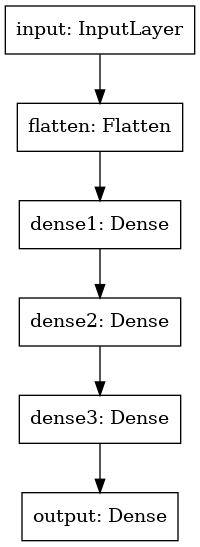

In [ ]:
utils.plot_model(model)

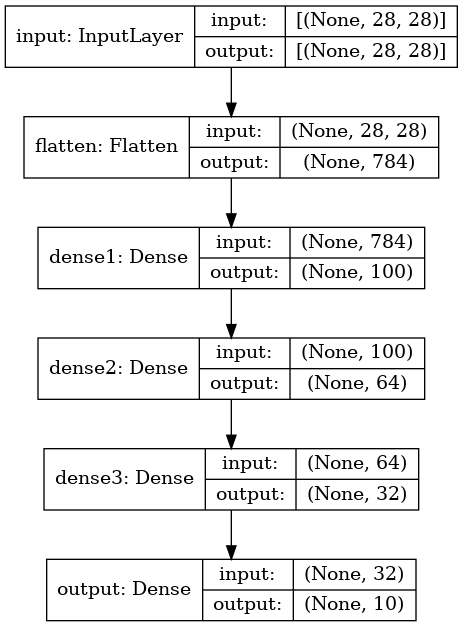

In [ ]:
utils.plot_model(model, show_shapes=True)

**모델 컴파일 및 학습**

구성한 모델에 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정하고, 옵티마이저는 가장 기본적인 sgd을 지정합니다. 그리고 분류에 대한 성능을 확인하기 위한 지표로 accuracy를 지정합니다.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

이제 본격적으로 딥러닝 모델을 학습하기 위해 fit을 실행시키는데, 이때 학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 학습을 반복하는 에폭 수(epochs)는 40으로 지정하며, 배치 사이즈(batch_size)는 128로 지정합니다. 그리고 검증을 위해서 나누었던 데이터로 x_val와 y_val을 지정해줍니다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 1.6903 - accuracy: 0.5093 - val_loss: 0.9388 - val_accuracy: 0.7641
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6728 - accuracy: 0.8232 - val_loss: 0.5332 - val_accuracy: 0.8496
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.4673 - accuracy: 0.8704 - val_loss: 0.4250 - val_accuracy: 0.8781
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8904 - val_loss: 0.3708 - val_accuracy: 0.8925
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.9017 - val_loss: 0.3444 - val_accuracy: 0.9007
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.9105 - val_loss: 0.3159 - val_accuracy: 0.9074
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.9165 - val_loss: 0.2979 - val_accuracy: 0.9119
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

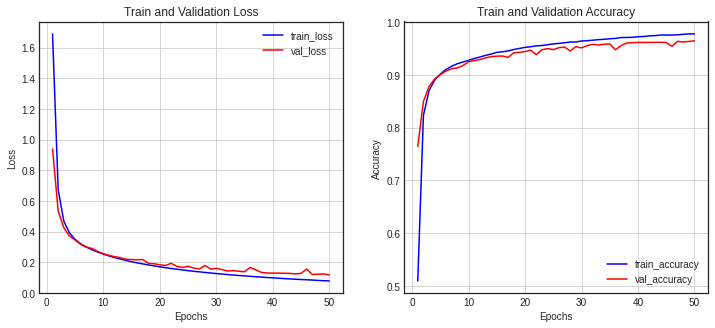

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9646


[0.10801276564598083, 0.9646000266075134]

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[1.1132462e-05 2.3213107e-07 4.7822094e-05 4.9624359e-05 1.2207404e-09
 1.2945712e-06 4.9889487e-10 9.9987328e-01 6.1331576e-07 1.5942182e-05]


결과값 중에서 가장 큰 수가 있는 위치값을 np.argmax()를 통해서 구하고, 예측한 레이블 값 arg_pred_y[0]과 실제 숫자 이미지인 x_test[0]를 출력해 봅니다.

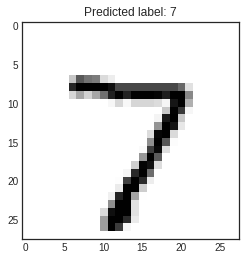

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

모델이 제대로 분류를 수행했는지 알기 위해서 사이킷런(Scikit-Learn)에 포함된 classification_report를 임포트해서 각종 지표들을 한눈에 살펴봅니다.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.94      0.96      0.95       892
           6       0.96      0.96      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



각 레이블 별로 분류가 얼마나 잘 수행되었는지 한눈에 살펴볼 수 있도록 혼동 행렬(Confusion Matrix)을 이용해 시각화합니다.

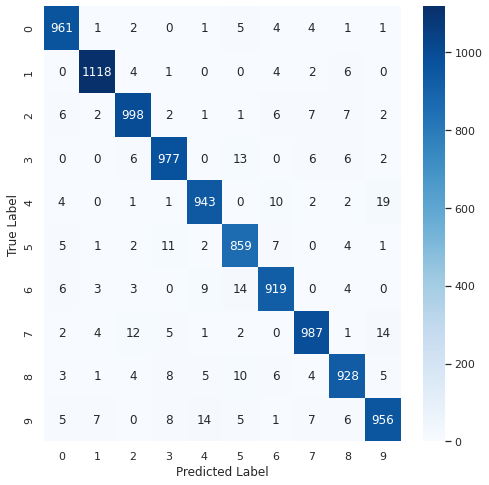

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**모델 저장과 로드**

어느 정도 학습이 되었다면 추후에 모델을 사용하기 위해서 저장할 필요가 있습니다. 모델을 저장할 때는 save() 함수를 사용하여 쉽게 저장할 수 있고, 다시 모델을 불러올 때는 load_model() 함수를 사용하면 됩니다. 모델을 저장하고 로드하는 것에서 중요한 점은 모델 생성 시에 Sequencial API 또는 Functional API를 사용한 경우에는 모델의 저장 및 로드가 가능하지만 Subclassing API 방식은 사용할 수가 없습니다. Subclassing API 방식은 save_weights()와 load_weights()를 이용해 모델의 파라미터만 저장 및 로드하는 것이 가능합니다. 만약 JSON 형식으로 모델을 저장하려면 to_json()를 사용하여 가능하고, JSON 파일로부터 모델을 로드하려면 model_from_json()을 사용하면 됩니다. 그 밖에도 YAML로 직렬화하여 저장할 경우 to_yaml()를 사용하고, model_from_yaml()를 사용하여 로드하면 됩니다.

In [ ]:
model.save('mnist_model.h5')

In [ ]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[1.1132462e-05 2.3213107e-07 4.7822094e-05 4.9624359e-05 1.2207404e-09
 1.2945712e-06 4.9889487e-10 9.9987328e-01 6.1331576e-07 1.5942182e-05]


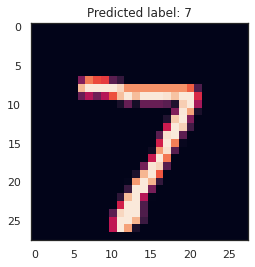

In [ ]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

#matlotlib를 이용해서 시각화하기
plt.title(f'Predicted label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

**Q. to_json() 함수를 이용해 모델을 저장해보고 다시 불러서 결과를 확인해보세요. 결과가 같은가요, 다른가요?**

In [ ]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0.08192924 0.10863584 0.07851476 0.09064114 0.09177045 0.10008983
 0.11138269 0.11890652 0.09886066 0.11926887]


(10000, 10)
[0.10260062 0.10532021 0.09254112 0.10893321 0.07868294 0.07395351
 0.09897457 0.08913266 0.13795546 0.11190575]


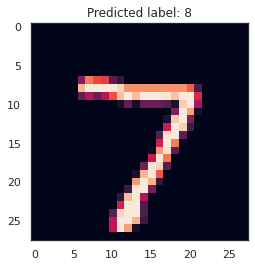

In [ ]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

#예측값 시각화하기
arg_pred_json = np.argmax(predictions, axis=1)

#matlotlib를 이용해서 시각화하기
plt.title(f'Predicted label: {arg_pred_json[0]}')
plt.imshow(x_test[0])
plt.show()

**Callbacks**

모델을 fit() 함수를 통해 학습시키는 동안 callbacks 매개변수를 사용하여 학습 시작이나 끝에 호출할 객체 리스트를 여러 개 지정할 수 있습니다. 콜백의 대표적인 예로는 ModelCheckpoint, EarlyStopping, LearningRateScheduler, Tensorboard가 있습니다.

먼저 tensorflow.keras.callbacks를 임포트하여 줍니다.

In [ ]:
from tensorflow.keras import callbacks

**ModelCheckpoint**

tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용합니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0836 - accuracy: 0.9763
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0783 - accuracy: 0.9777
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9793
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9806
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0619 - accuracy: 0.9819
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9835
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9844
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9852
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9867
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.043

최상의 모델만을 저장하는 옵션으로 save_best_only=True를 지정합니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.1063 - val_accuracy: 0.9692
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0371 - accuracy: 0.9896 - val_loss: 0.1028 - val_accuracy: 0.9702
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0348 - accuracy: 0.9904 - val_loss: 0.1054 - val_accuracy: 0.9712
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9912 - val_loss: 0.1245 - val_accuracy: 0.9657
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0298 - accuracy: 0.9925 - val_loss: 0.1048 - val_accuracy: 0.9708
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0275 - accuracy: 0.9928 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.1057 - val_accuracy:

**EarlyStopping**

tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용합니다. 일정 patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 멈추게 됩니다. 모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방합니다. 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없습니다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0186 - accuracy: 0.9963 - val_loss: 0.1024 - val_accuracy: 0.9725
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0170 - accuracy: 0.9966 - val_loss: 0.1061 - val_accuracy: 0.9722
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0159 - accuracy: 0.9970 - val_loss: 0.1044 - val_accuracy: 0.9722
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0148 - accuracy: 0.9971 - val_loss: 0.1122 - val_accuracy: 0.9704


**LearningRateScheduler**

tf.keras.callbacks.LearningRateSchduler: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용합니다. 에폭 수가 10 미만일 경우는 학습률을 그대로 하고, 10 이상이 되면 -0.1%씩 감소시키는 코드입니다.

In [ ]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [ ]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [ ]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

**Tensorboard**

tf.keras.callbacks.TensorBoard: 모델의 경과를 모니터링할 때 사용합니다. 텐서보드를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성합니다. 텐서보드에는 효율적인 모니터링을 위해서 여러가지 기능들을 제공하고 있습니다.

In [ ]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0055 - accuracy: 0.9997 - val_loss: 0.1123 - val_accuracy: 0.9727
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.1129 - val_accuracy: 0.9724
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.1143 - val_accuracy: 0.9728
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.1175 - val_accuracy: 0.9723
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.1154 - val_accuracy: 0.9724
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 0.1163 - val_accuracy: 0.9726
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0044 - accuracy: 0.9998 - val_loss: 0.1155 - val_accuracy:

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir {log_dir}

### 6. 모델 학습 기술

**학습 목표**

* 딥러닝 모델 학습을 위한 다양한 개념과 기술들을 설명할 수 있습니다.
* 모델 학습이 잘 안될 경우 발생하는 과소적합/과대적합에 대해 설명할 수 있습니다.
* IMDB 데이터셋을 이용해 긍정/부정 분류를 위한 딥러닝 모델을 만들어봅니다.

**Q. 대표적인 데이터 스케일링 방법인 표준화(Standardization)와 정규화(Normalization)은 어떤 차이가 있나요?**

```
표준화는 평균이 0이지만 데이터 크기에 대한 제한이 없으며 정규화는 최대, 최소값이 각각 1과 0으로 정해져있습니다.
```

**Q. 손실 함수의 최저값에 도달하기 위해선 학습률이 작을 수록 일반적으로 에폭의 수는 어떻게 될까요?**

```
많아집니다. 학습률이 작은 경우 최저값에 도달하기까지 업데이트 횟수가 더 많이 필요하다는 의미이기 때문입니다.
```

**Q. 활성화함수에는 시그모이드(Sigmiod)계열과 렐루(ReLU)) 두가지 계열로 나뉘는데 두 계열간 어떤 차이가 있나요?**

```
시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나오며,
렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓습니다.
```

**Q. 적절한 가중치 초기값을 정해주는 것은 어떤 효과를 가져올 수 있나요?**

```
표현할 수 있는 신경망의 수가 많아지고 더 많은 가중치에 역전파가 전달 가능하며 비교적 많은 문제를 표현할 수 있게 됩니다.
```

**Q. 옵티마이저의 역할과 목적은 무엇인가요?**

```
손실함수를 감소시키기 위해(실제와 예측간의 차이를 감소시키기 위해) 가중치를 업데이트 하는 방식을 결정합니다.

    SGD: 최소점을 찾는 과정에서 멈추거나 매우 속도가 느리다는 단점이 있지만,
        모멘텀과 Nesterov momentum, 그리고 학습률 감소 기법(learning rate decay)을 지원.
    RMSprop: 가장 최근의 그래디언트만 반영하여 전력 최적점을 수렴. 지수적 감소를 사용하여 구현.
    Adagrad: 그래디언트 벡터값을 스켈링하여 단위로 인한 경사 하강의 오류를 수정하는 방법으로 변화하는 기울기 전체의 내역을 고려.
    Adadelta: Adagrad는 너무 빨리 기울기를 0으로 만들어버려서 그래디언트 업데이트의 윈도우에 기반하여 학습률 조정.
    Adam: Adaptive Moment Estimator의 줄임말로 모멘텀 최적화와 RMSprop을 병합한 방법.
```

**Q. 과소적합과 과대적합을 방지하기 위해선 어떤 방법들을 사용할 수 있나요?**

```
언더피팅일 경우에는 에폭을 늘려서 충분한 학습이 이뤄질 수 있도록 하고, 오버피팅일 경우에는 다양한 학습 데이터를 수집해서 학습시키거나
파라미터가 적은 모델을 선택하거나 학습 데이터의 특성 수를 줄이는 등의 모델 단순화 작업이 필요함
```

**IMDB 딥러닝 모델**

IMDB 데이터셋은 영화 사이트 IMDB의 리뷰 데이터를 모아놓은 것으로 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터입니다. 데이터셋은 리뷰 텍스트와 레이블로 구성되어 있고, 레이블은 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시합니다.

**데이터 로드 및 전처리**

케라스에서는 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 다운로드가 가능합니다. 예제로 사용하는 것이니 num_words는 10000개로만 제한하여 데이터를 로드합니다. 즉, 단어의 인덱스는 0부터 9999까지만 구성됩니다. train_data의 0번째를 출력해보면 단어들의 인덱스가 출력되는 것을 알 수 있습니다. 그리고 train_label의 0번째를 출력하면 긍정을 의미하는 1이 출력되는 것을 알 수 있습니다.

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


IMDB의 데이터셋은 인덱스로만 구성되어 있기 때문에 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용해야하며, imdb.get_word_index() 함수를 통해 얻을 수 있습니다. 아래 코드블럭의 주석을 풀면 word_index 딕셔너리를 확인하실 수 있습니다.

In [ ]:
word_index = imdb.get_word_index()
# word_index

1654784/1641221 [==============================] - 0s 0us/step


단어 인덱스 딕셔너리를 인덱스 단어 딕셔너리 형태로 역으로 변환시킵니다. 아래 코드블럭의 주석을 풀면 index_word 딕셔너리를 확인하실 수 있습니다.

In [ ]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

imdb.get_word_index() 함수를 통해 얻은 데이터의 index는 단어 출현 빈도 기준으로 내림차수 정렬되어있습니다. 따라서 아래 코드블럭의 index_word 의 키 값을 바꿔가며 해당 출현 빈도 순에 해당하는 단어를 살펴볼 수 있어요.

In [ ]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요

index_word[1]

'the'

In [ ]:
# Q. 25번째 단어를 키로 삼아 word_index에 어떤 값(value)가 담겨있는지 확인해 봅시다.

word_25th = index_word[25]
print(word_25th )

have


In [ ]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [ ]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

텍스트 데이터를 딥러닝 모델의 학습에 사용하기 위해서는 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법이 있고, 그 밖에도 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법이 있습니다. 이 예제에서는 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리하도록 합니다.

In [ ]:
 # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환을 시켜줍니다.

In [ ]:
print(train_labels[0])
print(test_labels[0])

1
0


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


**모델 구성**

이제 실제 IMDB 데이터셋을 학습하고 긍정/부정을 분류할 딥러닝 모델을 정의합니다. Sequential() 함수를 이용해서 순차적으로 레이어를 추가합니다. 첫번째 레이어는 Dense로 유닛수 16개를 가지고, input_shape을 (10000, )으로 정의하여 10000 차원의 데이터를 입력으로 받을 수 있게 합니다. 그리고 활성화 함수인 activation은 relu로 사용하고, 레이어의 이름인 name을 input으로 지정합니다. 두번째 레이어도 마찬가지로 Dense로 유닛수 16개를 가지고, relu 활성화 함수를 사용하고 이름은 hidden으로 지정합니다. 세번째 레이어도 Dense 레이어를 사용하지만, 긍정/부정 결과만 받도록 유닛수는 1개만 가지고, 활성화 함수는 sigmoid를 사용하고, 이름은 output으로 지정합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

**모델 컴파일 및 학습**

이제 정의한 모델을 컴파일을 통해서 옵티마이저인 optimizer는 rmsprop를 사용하고, 손실 함수인 loss는 긍정/부정만 분류하므로 binary_crossentropy를 지정합니다. 그리고 지표인 metrics는 accuracy를 사용합니다. 이제 summary() 함수를 사용해 모델의 구조를 시각화합니다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


이제 딥러닝 모델을 학습하기 위해 fit() 함수를 실행시킵니다. 학습에 사용되는 데이터로 x_train과 y_train을 지정하고, 에폭 수인 epochs는 20으로 지정하고, 배치 사이즈인 batch_size는 512로 지정합니다. 그리고 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정해줍니다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 72ms/step - loss: 0.4414 - accuracy: 0.8271 - val_loss: 0.3370 - val_accuracy: 0.8788
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2609 - accuracy: 0.9084 - val_loss: 0.2872 - val_accuracy: 0.8874
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2003 - accuracy: 0.9294 - val_loss: 0.2805 - val_accuracy: 0.8884
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1686 - accuracy: 0.9390 - val_loss: 0.2937 - val_accuracy: 0.8832
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1441 - accuracy: 0.9494 - val_loss: 0.3416 - val_accuracy: 0.8702
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1281 - accuracy: 0.9553 - val_loss: 0.3458 - val_accuracy: 0.8715
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1141 - accuracy: 0.9608 - val_loss: 0.3571 - val_accuracy: 0.8709
Epoch 8/20
49

학습하며 저장된 모델의 지표 결과인 history에서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

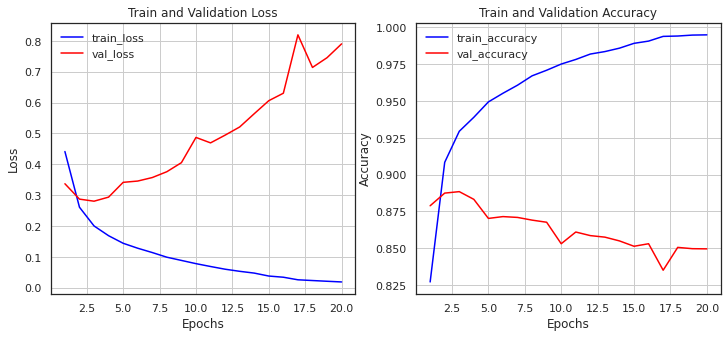

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 7. 모델 크기 조절과 규제

**학습 목표**

* 딥러닝 모델의 크기를 조절해봅니다.
* 효과적인 딥러닝 모델 학습을 위한 규제를 해봅니다.

**데이터 로드 및 전처리**

먼저 모델의 학습에 사용하기 위해 원-핫 인코딩(one-hot encoding)을 위한 함수를 정의합니다. 그리고 imdb.load_data()를 통해 IMDB 데이터를 다운로드한 뒤, 10000 차원의 학습 데이터로 원-핫 인코딩을 수행합니다.

In [ ]:
from keras.datasets import imdb
import numpy as np

# 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**모델 구성 및 컴파일**

IMDB 데이터셋에 대해 분류하는 모델로서 기존에 정의했던 3개의 Dense 레이어를 가지는 딥러닝 모델을 정의합니다. 그리고 rmsprop 옵티마이저, binary_crossentropy 손실 함수, accuracy 지표를 사용하도록 컴파일 합니다. summary()를 통해 확인해보면, 모델의 전체 파라미터의 수가 1,296,769개인 것을 알 수 있습니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 69ms/step - loss: 0.4207 - accuracy: 0.8182 - val_loss: 0.3130 - val_accuracy: 0.8715
Epoch 2/10
49/49 [==============================] - 1s 19ms/step - loss: 0.2329 - accuracy: 0.9101 - val_loss: 0.3083 - val_accuracy: 0.8724
Epoch 3/10
49/49 [==============================] - 1s 19ms/step - loss: 0.1662 - accuracy: 0.9367 - val_loss: 0.5368 - val_accuracy: 0.7947
Epoch 4/10
49/49 [==============================] - 1s 18ms/step - loss: 0.1162 - accuracy: 0.9564 - val_loss: 0.3213 - val_accuracy: 0.8787
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0743 - accuracy: 0.9744 - val_loss: 0.3536 - val_accuracy: 0.8754
Epoch 6/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0454 - accuracy: 0.9868 - val_loss: 0.4575 - val_accuracy: 0.8732
Epoch 7/10
49/49 [==============================] - 1s 19ms/step - loss: 0.0379 - accuracy: 0.9898 - val_loss: 0.5329 - val_accuracy: 0.8726
Epoch 8/10
49

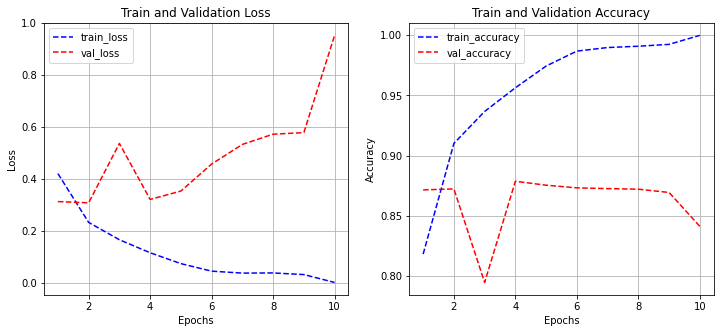

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 크기 증가**

모델의 크기를 증가시키면 어떻게 될까요? Dense 레이어의 유닛수를 128에서 2048로 크게 증가시켜서 모델의 전체 파라미터 수가 24,680,449개가 되었습니다.

In [ ]:
b_model = models.Sequential()
b_model.add(layers.Dense(1024, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(1024, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=10,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 79ms/step - loss: 0.5537 - accuracy: 0.7909 - val_loss: 0.3023 - val_accuracy: 0.8750
Epoch 2/10
49/49 [==============================] - 1s 25ms/step - loss: 0.2260 - accuracy: 0.9094 - val_loss: 0.2809 - val_accuracy: 0.8876
Epoch 3/10
49/49 [==============================] - 1s 24ms/step - loss: 0.1282 - accuracy: 0.9553 - val_loss: 0.3140 - val_accuracy: 0.8797
Epoch 4/10
49/49 [==============================] - 1s 24ms/step - loss: 0.0691 - accuracy: 0.9832 - val_loss: 0.4300 - val_accuracy: 0.8825
Epoch 5/10
49/49 [==============================] - 1s 25ms/step - loss: 0.1024 - accuracy: 0.9853 - val_loss: 0.3875 - val_accuracy: 0.8812
Epoch 6/10
49/49 [==============================] - 1s 25ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.6588 - val_accuracy: 0.8806
Epoch 7/10
49/49 [==============================] - 1s 25ms/step - loss: 8.0154e-05 - accuracy: 1.0000 - val_loss: 0.7904 - val_accuracy: 0.8822
Epoch 8/1

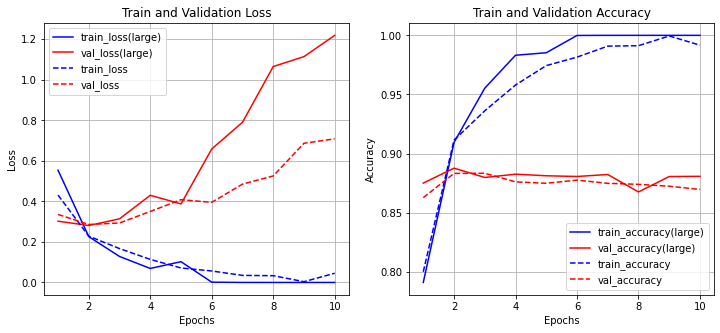

In [ ]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 모델의 크기가 클수록, 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고, 학습 손실이 낮아지는 것을 알 수 있습니다. 그러나 모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능합니다.

**모델 크기 감소**

이제 모델에서 사용한 Dense 레이어의 유닛수를 128대신 16으로 줄여서 사용합니다. 즉, 모델의 크기를 줄여서 전체 파라미터의 수가 160,305개로 줄어들게 됩니다.

In [ ]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 16)                160016    
_________________________________________________________________
hidden2 (Dense)              (None, 16)                272       
_________________________________________________________________
output2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=10,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 68ms/step - loss: 0.4516 - accuracy: 0.8212 - val_loss: 0.3503 - val_accuracy: 0.8716
Epoch 2/10
49/49 [==============================] - 1s 18ms/step - loss: 0.2623 - accuracy: 0.9104 - val_loss: 0.3109 - val_accuracy: 0.8738
Epoch 3/10
49/49 [==============================] - 1s 18ms/step - loss: 0.2024 - accuracy: 0.9284 - val_loss: 0.2815 - val_accuracy: 0.8895
Epoch 4/10
49/49 [==============================] - 1s 18ms/step - loss: 0.1680 - accuracy: 0.9415 - val_loss: 0.3172 - val_accuracy: 0.8758
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.1455 - accuracy: 0.9487 - val_loss: 0.3084 - val_accuracy: 0.8798
Epoch 6/10
49/49 [==============================] - 1s 18ms/step - loss: 0.1228 - accuracy: 0.9598 - val_loss: 0.3305 - val_accuracy: 0.8770
Epoch 7/10
49/49 [==============================] - 1s 17ms/step - loss: 0.1105 - accuracy: 0.9621 - val_loss: 0.3545 - val_accuracy: 0.8729
Epoch 8/10
49

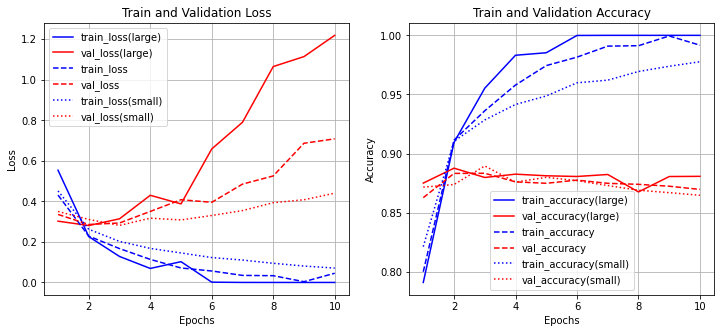

In [ ]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감한 것을 알 수 있습니다. 즉, 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절 해야 된다는 것을 알 수 있습니다. 그렇다면 어느정도 파라미터가 적절할까요?

**Playground**

In [ ]:
my_model = models.Sequential()
my_model.add(layers.Dense(32, activation='relu', input_shape=(10000, ), name='input2'))
my_model.add(layers.Dense(32, activation='relu', name='hidden2'))
my_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
my_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
my_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 32)                320032    
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
output2 (Dense)              (None, 1)                 33        
Total params: 321,121
Trainable params: 321,121
Non-trainable params: 0
_________________________________________________________________


**Regularization**

모델의 과대적합을 방지하는 방법 중에 하나로 규제가 있습니다. 가중치의 파라미터 값이 커서 과대적합이 발생하는 경우가 많기 때문에 이를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화입니다. 규제를 통해 가중치의 절댓값을 가능한 작게 만들어서 가중치의 모든 원소를 0에 가깝게 하여 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것을 의미합니다. 즉, 기울기를 작게 만드는 과정이 되겠습니다.

규제를 통해서 가중치의 분포가 더 균일하게 되고, 복잡한 네트워크일수록 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 합니다. 규제가 모델이 과대적합 되지 않도록 강제로 제한하는 역할을 하므로 적절한 규제값을 찾는 것이 중요합니다.

모델의 손실함수에서 큰 가중치에 비용을 추가하는 형태로 규제를 적용할 수 있으며 대표적인 방법으로 L1 규제와 L2 규제가 있습니다. L1 규제는 가중치의 절댓값에 비례하는 비용이 추가되고, L2 규제는 가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례하는 비용이 추가됩니다. 또한, L1과 L2를 둘다 합쳐서 사용하는 경우도 존재합니다.

**L1 Regularization**

L1 규제는 가중치의 절댓값 합에 비례하는 비용을 손실 함수에 추가 하는 방법이며, 가중치의 절대값은 L1 노름(norm) 이라고 하며 다음과 같이 표현됩니다. α 값을 이용하여 사용자가 하이퍼파라미터처럼 규제의 조절이 가능합니다. 먼저 α 값을 증가시키면 규제가 강해져서 가중치 절댓값의 합을 줄이도록 학습하여 가중치가 0인 중요하지 않은 것들을 제외되어 일반화에 적합하게 됩니다. 반면 α 값을 감소시키면 규제가 약해져서 가중치 값이 증가하고 과대적합이 발생할 수 있습니다.

케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1으로 지정해주면 됩니다. 물론 레이어에 bias_regularizer와 activity_regularizer에도 적용할 수 있습니다.

케라스에서 L1 규제를 사용하기 위해서는 적용할 레이어에서 가중치 정규화인 kernel_regularizer를 l1으로 지정해주면 됩니다. 물론 레이어에 편향 정규화인 bias_regularizer와 출력값 정규화인 activity_regularizer에도 적용할 수 있습니다.

In [ ]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 68ms/step - loss: 3.7189 - accuracy: 0.5492 - val_loss: 1.9254 - val_accuracy: 0.5000
Epoch 2/10
49/49 [==============================] - 1s 17ms/step - loss: 1.8562 - accuracy: 0.5861 - val_loss: 1.7847 - val_accuracy: 0.6124
Epoch 3/10
49/49 [==============================] - 1s 19ms/step - loss: 1.7392 - accuracy: 0.6364 - val_loss: 1.7042 - val_accuracy: 0.6552
Epoch 4/10
49/49 [==============================] - 1s 17ms/step - loss: 1.6570 - accuracy: 0.6442 - val_loss: 1.6094 - val_accuracy: 0.6248
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 1.5909 - accuracy: 0.6356 - val_loss: 1.5726 - val_accuracy: 0.6723
Epoch 6/10
49/49 [==============================] - 1s 17ms/step - loss: 1.5387 - accuracy: 0.6242 - val_loss: 1.5058 - val_accuracy: 0.6195
Epoch 7/10
49/49 [==============================] - 1s 18ms/step - loss: 1.5002 - accuracy: 0.5468 - val_loss: 1.4970 - val_accuracy: 0.6148
Epoch 8/10
49

ValueError: x and y must have same first dimension, but have shapes (30,) and (10,)

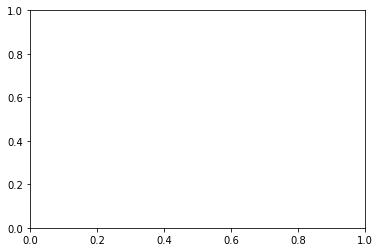

In [ ]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

기존 모델의 결과와 L1 규제를 사용한 결과를 비교해보면, 기존 모델은 Loss 값이 점점 증가하며 과대적합의 모습을 보이는 반면, L1 규제 결과는 안정적으로 Loss 값이 감소되는 것을 알 수 있습니다.

**L2 Regularization**

L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값에 더하는 방법 이며, 가중치의 제곱은 L2 노름(norm) 이라고 합니다. L2 규제는 가중치의 제곱에 비례하는 비용을 손실 함수의 일정 값을 더하여 과대적합을 방지합니다. 여기서 λ 값이 크면 가중치 감소가 커지고, 작으면 가하는 규제가 적어지게 됩니다. L2 규제는 L1보다 더 Robust한 모델을 생성하므로 많이 사용되는 방법 중 하나입니다.

케라스에서 L2 규제를 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l2로 지정해주면 됩니다.

In [ ]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 4s 68ms/step - loss: 0.6889 - accuracy: 0.8162 - val_loss: 0.5597 - val_accuracy: 0.8718
Epoch 2/10
49/49 [==============================] - 1s 18ms/step - loss: 0.5159 - accuracy: 0.8813 - val_loss: 0.5062 - val_accuracy: 0.8742
Epoch 3/10
49/49 [==============================] - 1s 17ms/step - loss: 0.4727 - accuracy: 0.8874 - val_loss: 0.4742 - val_accuracy: 0.8804
Epoch 4/10
49/49 [==============================] - 1s 18ms/step - loss: 0.4524 - accuracy: 0.8881 - val_loss: 0.4694 - val_accuracy: 0.8748
Epoch 5/10
49/49 [==============================] - 1s 18ms/step - loss: 0.4311 - accuracy: 0.8918 - val_loss: 0.4582 - val_accuracy: 0.8739
Epoch 6/10
49/49 [==============================] - 1s 18ms/step - loss: 0.4175 - accuracy: 0.8932 - val_loss: 0.4459 - val_accuracy: 0.8746
Epoch 7/10
49/49 [==============================] - 1s 18ms/step - loss: 0.4073 - accuracy: 0.8962 - val_loss: 0.4267 - val_accuracy: 0.8833
Epoch 8/10
49

ValueError: x and y must have same first dimension, but have shapes (30,) and (10,)

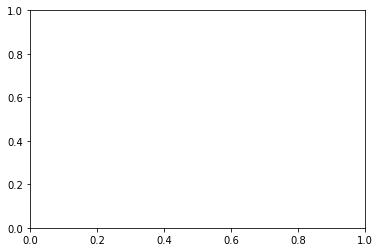

In [ ]:
import matplotlib.pyplot as plt

l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L2 규제 방법은 기존 모델 결과와 비교해 Loss 값이 매우 낮게 감소되어 과대적합 문제를 해결하는 것을 알 수 있습니다.

**L1 L2 Regularization**

L1과 L2 규제를 같이 적용하는 방법도 존재하는데, 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정해주면 됩니다.

In [ ]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
47/49 [===========================>..] - ETA: 0s - loss: 3.9359 - accuracy: 0.5778

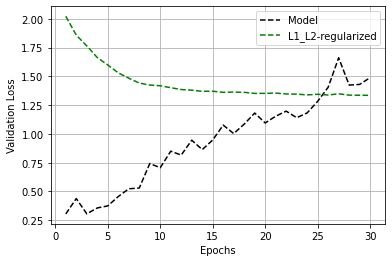

In [ ]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

L1 L2 규제를 함께 사용하는 경우는 L1 규제와 큰 차이가 없는 것을 알 수 있습니다.

NameError: name 'l1_val_loss' is not defined

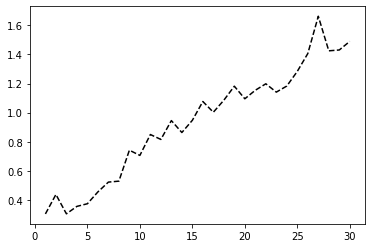

In [ ]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

전체 규제 방법들을 다 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있습니다. 물론 어떤 모델에 어떤 규제 방법이 좋을지는 실험을 통해 찾아가는 과정이 필요합니다.

위에서 다양한 종류의 규제를 사용해 보았지만 영상에서도 언급했듯이 큰 규제 값을 줄 수도 있고 작은 규제 값을 줄 수도 있습니다. 위에서 실험한 결과 가장 좋아 보인 L2 규제라도 어떤 규제 값을 주느냐에 따라 결과가 달라질 것입니다. 이 부분은 여러분이 kernel_regularizaer 부분을 직접 변경해가며 찾아보시죠. 여러분의 val_loss는 노란색으로 표시했습니다.

**Playground**

In [ ]:
# L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.
from tensorflow import keras
from tensorflow.keras import models, layers

meh_model =  models.Sequential()
meh_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.02), activation='relu', input_shape=(10000, )))
meh_model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.02), activation='relu'))
meh_model.add(layers.Dense(1, activation='sigmoid'))
meh_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
meh_model.summary()

In [ ]:
meh_model_hist = meh_model.fit(x_train, y_train,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt

history_dict = meh_model_hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

your_val_loss = meh_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

**Dropout**

딥러닝 모델의 과대적합을 방지하기 위한 규제 기법 중 하나로 자주 사용되는 드롭아웃이 있습니다. 다른 규제 기법과 달리 드롭아웃은 개념도 쉽고 효과적이며 사용하기도 간편하여 가장 널리 사용되는 방법입니다. 드롭아웃은 모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용 하는 방법입니다.

신경망에 드롭아웃을 적용하면, 학습이 진행되는 동안 무작위로 층(레이어)의 일부 특성(노드)를 제외하는 형태로 동작합니다. 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면, 무작위로 0으로 바뀌어서 [0, 3.2, 0.6, 0.8, 0]가 됩니다. 일반적으로는 20% ~ 50% 사이의 비율로 지정되어 사용됩니다. 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여주게 됩니다.

**Dropout 20%**

드롭아웃이 포함된 딥러닝 모델을 정의하기 위해 기존 모델에서 사용한 구조에서 적절한 위치에 드롭아웃 레이어를 추가해야 합니다. 먼저 첫번째 레이어와 두번째 레이어 사이에 Dropout 레이어를 추가하는데, 20% 정도만 적용하기 위해서 0.2로 지정해줍니다. 마찬가지로 기존 두번째 레이어와 세번째 레이어 사이에 20%로 적용한 Dropout 레이어를 추가합니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 69ms/step - loss: 0.5055 - accuracy: 0.7765 - val_loss: 0.3606 - val_accuracy: 0.8736
Epoch 2/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3265 - accuracy: 0.8785 - val_loss: 0.2957 - val_accuracy: 0.8868
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2580 - accuracy: 0.9085 - val_loss: 0.2798 - val_accuracy: 0.8882
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.2082 - accuracy: 0.9276 - val_loss: 0.2810 - val_accuracy: 0.8874
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1790 - accuracy: 0.9396 - val_loss: 0.3009 - val_accuracy: 0.8818
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1517 - accuracy: 0.9481 - val_loss: 0.3128 - val_accuracy: 0.8809
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.1297 - accuracy: 0.9570 - val_loss: 0.3456 - val_accuracy: 0.8765
Epoch 8/30
49

ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

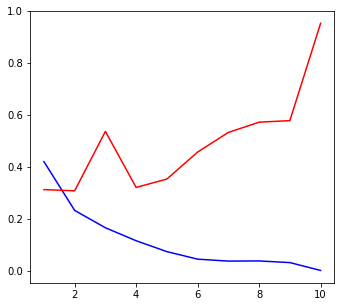

In [ ]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**Dropout 50%**

기존 모델보다 드롭아웃 비중을 50%로 증가시키기 위해 Dropout 레이어에서 0.2로 지정된 값을 0.5로 증가시켜 줍니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 68ms/step - loss: 0.6206 - accuracy: 0.6646 - val_loss: 0.5373 - val_accuracy: 0.7836
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.5097 - accuracy: 0.8267 - val_loss: 0.4666 - val_accuracy: 0.8480
Epoch 3/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4410 - accuracy: 0.8775 - val_loss: 0.4211 - val_accuracy: 0.8716
Epoch 4/30
49/49 [==============================] - 1s 17ms/step - loss: 0.3854 - accuracy: 0.8974 - val_loss: 0.3802 - val_accuracy: 0.8822
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.3345 - accuracy: 0.9094 - val_loss: 0.3486 - val_accuracy: 0.8805
Epoch 6/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2940 - accuracy: 0.9177 - val_loss: 0.3521 - val_accuracy: 0.8828
Epoch 7/30
49/49 [==============================] - 1s 18ms/step - loss: 0.2599 - accuracy: 0.9262 - val_loss: 0.3438 - val_accuracy: 0.8813
Epoch 8/30
49

ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

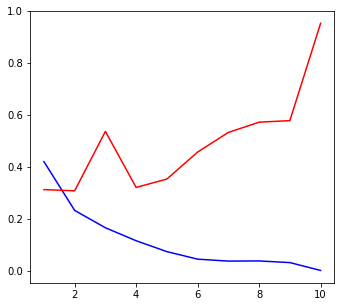

In [ ]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 8. 가중치 초기화와 배치 정규화

**학습 목표**

* 딥러닝 모델의 효과적인 학습을 위한 가중치 초기화에 대해 학습합니다.
* Reuters 데이터셋을 이용해 다중 분류를 위한 딥러닝 모델에 대해 학습합니다.
* 딥러닝 모델의 빠른 학습과 과대적합을 해결하는 배치 정규화 기술에 대해 학습합니다.

**Weights Initialization**

가중치 초기화는 신경망의 성능에 큰 영향을 주는 요소 중 하나입니다. 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생합니다. 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있습니다. 즉, 모델의 활성화 값이 골고루 분포 되는 것이 중요합니다.

가중치 초기화 방법에 따라서 어떻게 달라지는지 살펴보기 위해 지정된 활성화 함수 activation과 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의합니다.

In [ ]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

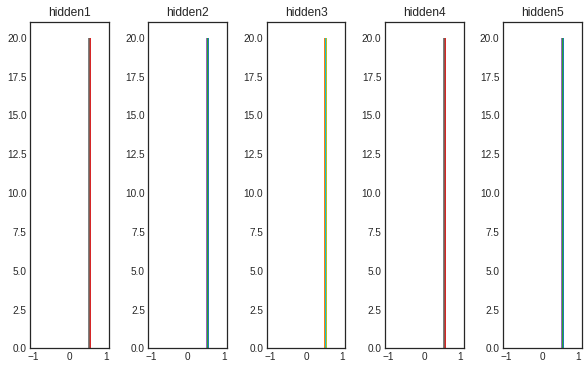

In [ ]:
# initializers.Zeros()를 이용해 가중치를 제로값으로 초기화해 봅시다.

from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

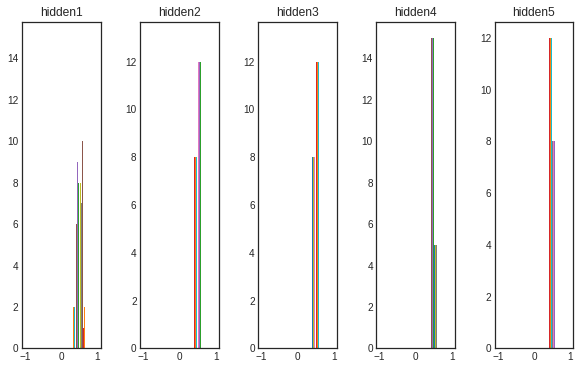

In [ ]:
# initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화해 봅시다.

model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

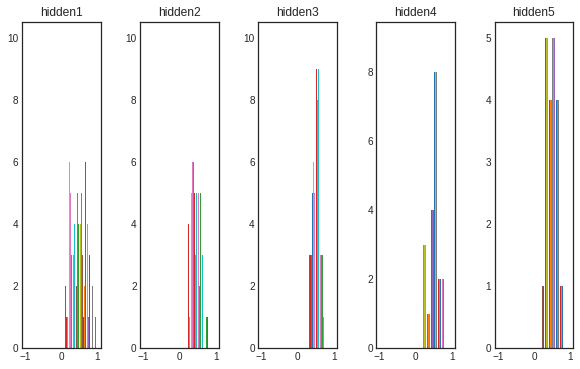

In [ ]:
# Xavier(Glorot) 정규분포 초기화

model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

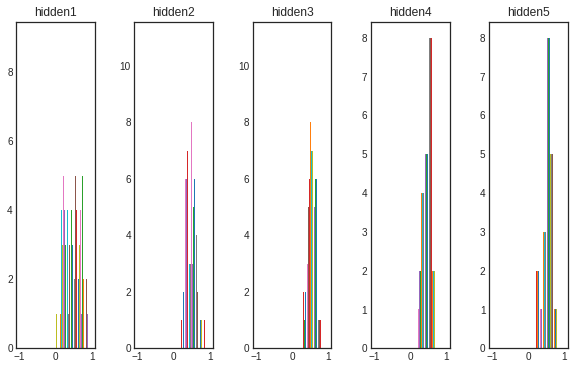

In [ ]:
# Xavier(Glorot) 균일분포 초기화

model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

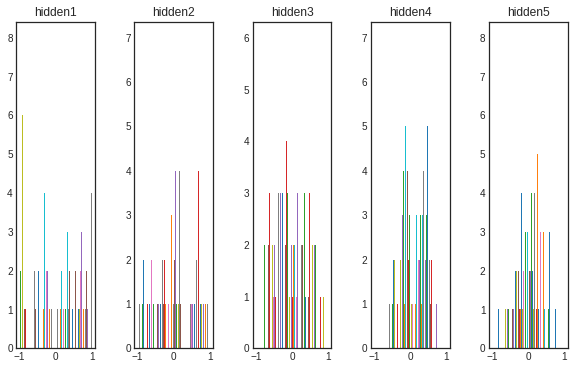

In [ ]:
# 활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있습니다.

model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

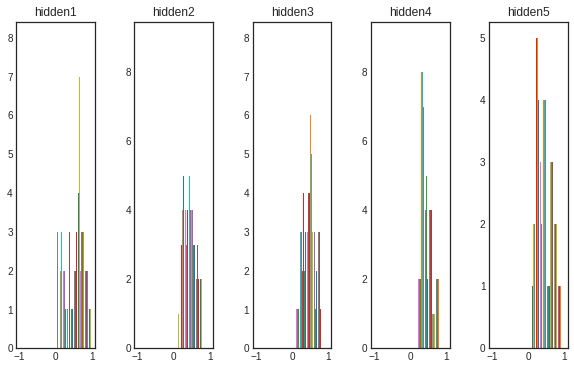

In [ ]:
# He 정규분포 초기화

model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

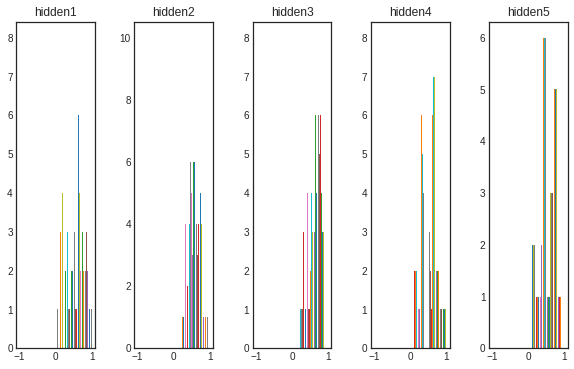

In [ ]:
# He 균일분포 초기화

model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

**비선형 함수 가중치 초기화**

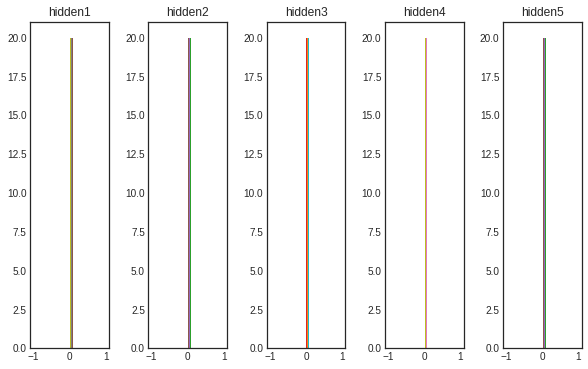

In [ ]:
# 제로 초기화

model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

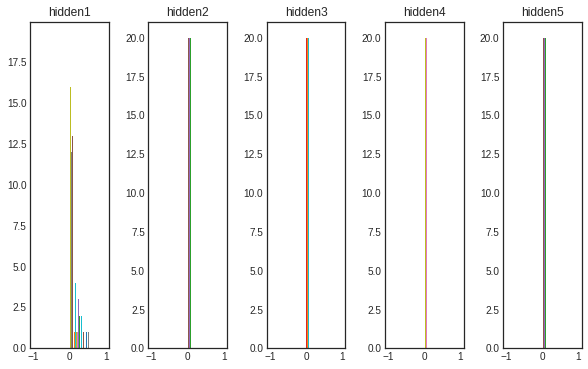

In [ ]:
# 정규분포 초기화

model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

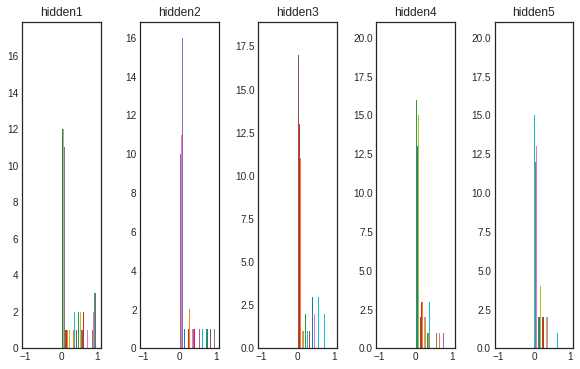

In [ ]:
# Xavier(Glorot) 정규분포 초기화

model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

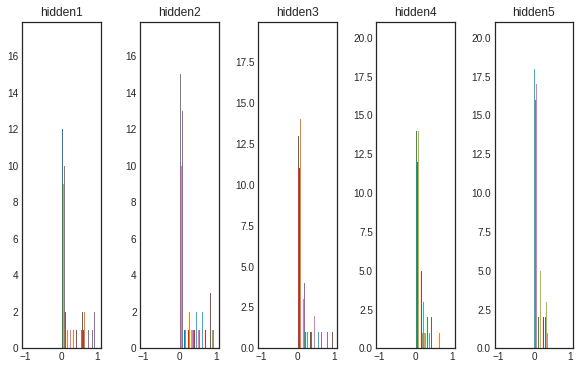

In [ ]:
# Xavier(Glorot) 균일분포 초기화

model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

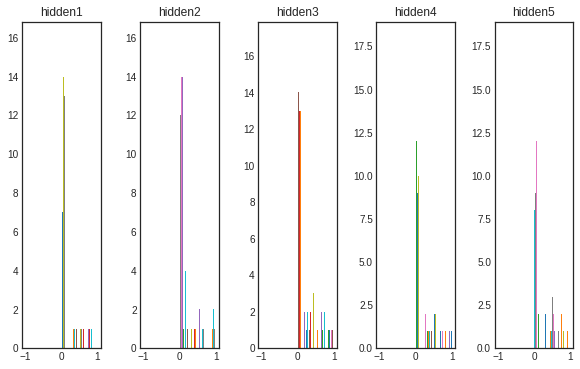

In [ ]:
# He 정규분포 초기화

model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

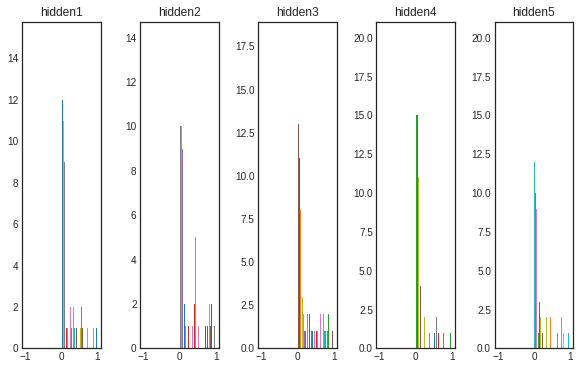

In [ ]:
# He 균일분포 초기화

model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

**Reuters 딥러닝 모델**

Reuters 데이터셋은 뉴스 기사를 모아놓은 것으로 주제 분류를 위해 자주 사용하는 데이터입니다. 데이터셋은 뉴스 기사 텍스트와 46개의 토픽으로 구성되어 있습니다. Reuters 데이터셋으로 가중치 초기화 실습을 해 봅시다.

**데이터 로드 및 전처리**

케라스에서는 Reuters 뉴스 기사 데이터를 reuters.load_data() 함수를 통해 다운로드가 가능합니다. 본 예제에서는 num_words를 10000개로 제한하여 데이터를 로드합니다. 기본적으로 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분되어 있습니다. 레이블을 통해 뉴스 기사의 주제로 46개가 있는 것을 알 수 있습니다.

In [ ]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


Reuters 데이터셋도 단어 인덱스로만 구성되어 있기 때문에 reuters.get_word_index() 함수를 통해 얻은 단어 인덱스 딕셔너리를 이용해 인덱스를 단어들로 변환이 가능합니다.

In [ ]:
word_index = reuters.get_word_index()
# word_index

In [ ]:
# 인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환시킵니다.

index_word = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad, 1은 문장의 시작을 의미하는 토큰인 sos, 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있습니다. 그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체합니다.

In [ ]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

딥러닝 모델의 학습에 사용하기 위해서는 텍스트 데이터를 벡터로 변환해야 합니다. 일반적으로 자주 사용되는 원-핫 인코딩(one-hot encoding)을 이용해 텍스트를 0과 1의 벡터로 변환합니다.

In [ ]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있습니다. 몇 개의 레이블을 확인해 봅시다.

print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환을 수행해 주어야 합니다. 케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있습니다.

In [ ]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**모델 구성**

Reuters 데이터셋을 주제별로 분류하기 위한 딥러닝 모델을 정의합니다. 순차적으로 레이어를 추가하여 단순한 모델을 생성하기 위해 Sequential() 함수를 사용합니다.

첫번째는 유닛수 256개, 활성화 함수는 'relu', 입력 차원은 10000, 이름은 input인 Dense 레이어를 추가합니다. 두번째도 마찬가지로 유닛수 256개를 가지고, relu 활성화 함수를 사용하며 이름은 hidden인 Dense 레이어를 추가합니다. 세번째는 뉴스 주제 갯수로 유닛수를 46개로 지정하고, 다중 분류이므로 활성화 함수는 softmax를 사용하고, 이름은 output으로 지정한 Dense 레이어를 추가합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

**모델 컴파일 및 학습**

정의한 모델에 사용할 옵티마이저는 rmsprop를 사용하고, 손실 함수는 다중 분류이므로 categorical_crossentropy를 지정합니다. 그리고 지표는 accuracy를 사용하고, 모델의 구조를 summary() 함수를 통해 살펴봅니다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


생성한 딥러닝 모델을 이용해 Reuters 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 40으로 지정합니다. 배치 사이즈는 512로 지정하고, 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정하여 fit() 함수를 실행시킵니다.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 39ms/step - loss: 2.1001 - accuracy: 0.5582 - val_loss: 1.4253 - val_accuracy: 0.6892
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.0673 - accuracy: 0.7730 - val_loss: 1.1204 - val_accuracy: 0.7551
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.7401 - accuracy: 0.8442 - val_loss: 0.9992 - val_accuracy: 0.7818
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5340 - accuracy: 0.8881 - val_loss: 0.9333 - val_accuracy: 0.7894
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3979 - accuracy: 0.9168 - val_loss: 0.9177 - val_accuracy: 0.7970
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3006 - accuracy: 0.9324 - val_loss: 0.9385 - val_accuracy: 0.7894
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2434 - accuracy: 0.9434 - val_loss: 0.9660 - val_accuracy: 0.7890
Epoch 8/40
18

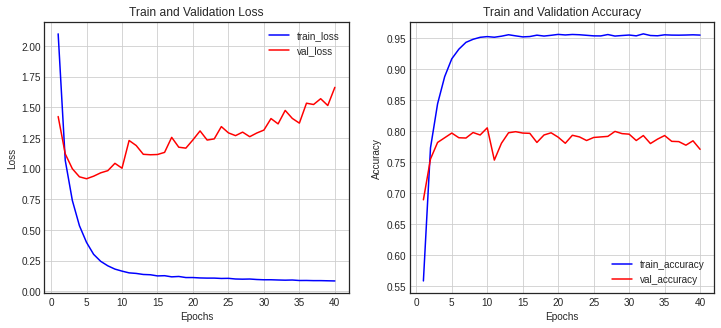

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**가중치 초기화**

이제 실제 Reuters 딥러닝 모델에 가중치 초기화를 적용한 결과를 살펴보기 위해 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의합니다. 케라스에서는 기본적으로 레이어에 균일분포 초기화를 수행하지만, 다른 초기화 방법과 비교해보도록 하겠습니다.

In [ ]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [ ]:
# 모델의 학습 히스토리 결과를 비교해보기 위해서 시각화하는 diff_history 함수를 정의

def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

In [ ]:
# 제로 초기화

zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 49ms/step - loss: 3.8103 - accuracy: 0.0499 - val_loss: 3.7955 - val_accuracy: 0.0441
Epoch 2/40
18/18 [==============================] - 0s 19ms/step - loss: 3.7841 - accuracy: 0.0994 - val_loss: 3.7726 - val_accuracy: 0.0592
Epoch 3/40
18/18 [==============================] - 0s 20ms/step - loss: 3.7614 - accuracy: 0.2525 - val_loss: 3.7505 - val_accuracy: 0.2110
Epoch 4/40
18/18 [==============================] - 0s 19ms/step - loss: 3.7391 - accuracy: 0.2906 - val_loss: 3.7288 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 19ms/step - loss: 3.7171 - accuracy: 0.3517 - val_loss: 3.7071 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 0s 18ms/step - loss: 3.6952 - accuracy: 0.3517 - val_loss: 3.6857 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 19ms/step - loss: 3.6735 - accuracy: 0.3420 - val_loss: 3.6643 - val_accuracy: 0.3620
Epoch 8/40
18

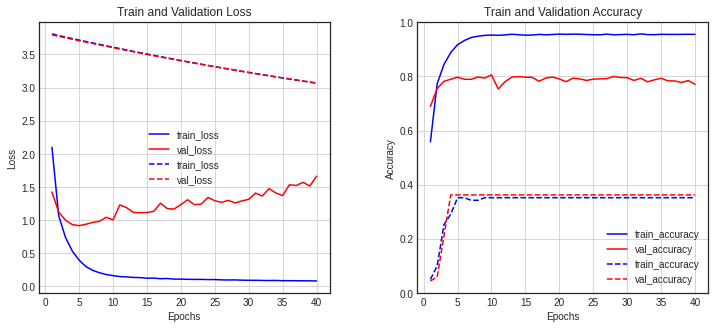

In [ ]:
# 기본 모델과 제로 초기화 모델 학습 결과를 비교해보면, 제로 초기화 모델은 학습이 제대로 되고 있지 않다는 것을 알 수 있습니다.

diff_history(history, zero_history)

In [ ]:
# 정규분포 초기화

normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 [==============================] - 1s 44ms/step - loss: 2.2533 - accuracy: 0.5008 - val_loss: 1.5657 - val_accuracy: 0.6492
Epoch 2/40
18/18 [==============================] - 0s 18ms/step - loss: 1.2855 - accuracy: 0.7079 - val_loss: 1.2814 - val_accuracy: 0.7097
Epoch 3/40
18/18 [==============================] - 0s 17ms/step - loss: 0.9590 - accuracy: 0.7827 - val_loss: 1.1741 - val_accuracy: 0.7257
Epoch 4/40
18/18 [==============================] - 0s 19ms/step - loss: 0.7369 - accuracy: 0.8329 - val_loss: 1.0384 - val_accuracy: 0.7551
Epoch 5/40
18/18 [==============================] - 0s 19ms/step - loss: 0.5653 - accuracy: 0.8743 - val_loss: 1.0047 - val_accuracy: 0.7640
Epoch 6/40
18/18 [==============================] - 0s 21ms/step - loss: 0.4404 - accuracy: 0.9015 - val_loss: 0.9966 - val_accuracy: 0.7787
Epoch 7/40
18/18 [==============================] - 0s 19ms/step - loss: 0.3517 - accuracy: 0.9186 - val_loss: 0.9683 - val_accuracy: 0.7894
Epoch 8/40
18

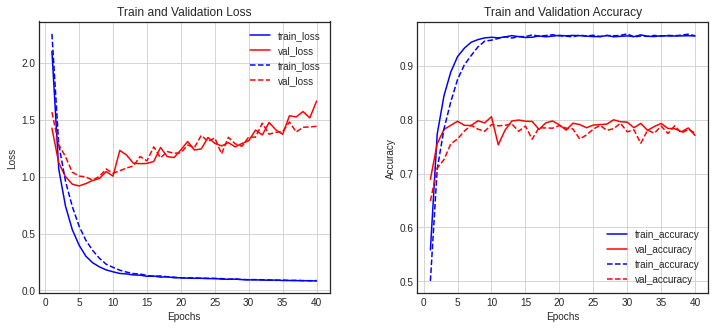

In [ ]:
diff_history(history, normal_history)

In [ ]:
# Xavier(Glorot) 초기화

glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.1671 - accuracy: 0.5814 - val_loss: 1.4420 - val_accuracy: 0.6857
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.0891 - accuracy: 0.7700 - val_loss: 1.1444 - val_accuracy: 0.7596
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7530 - accuracy: 0.8406 - val_loss: 1.0078 - val_accuracy: 0.7756
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5411 - accuracy: 0.8872 - val_loss: 0.9418 - val_accuracy: 0.7885
Epoch 5/40
18/18 [==============================] - 0s 12ms/step - loss: 0.3922 - accuracy: 0.9163 - val_loss: 0.9240 - val_accuracy: 0.7881
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3044 - accuracy: 0.9318 - val_loss: 0.9236 - val_accuracy: 0.7965
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2374 - accuracy: 0.9437 - val_loss: 0.9396 - val_accuracy: 0.8019
Epoch 8/40
18

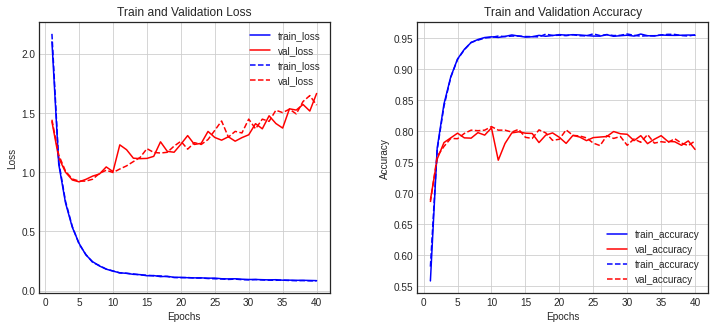

In [ ]:
diff_history(history, glorot_history)

In [ ]:
# He 초기화

he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.0489 - accuracy: 0.5832 - val_loss: 1.3689 - val_accuracy: 0.7186
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.9773 - accuracy: 0.7964 - val_loss: 1.0692 - val_accuracy: 0.7685
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6489 - accuracy: 0.8668 - val_loss: 0.9642 - val_accuracy: 0.7850
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.4435 - accuracy: 0.9086 - val_loss: 0.9069 - val_accuracy: 0.7961
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3219 - accuracy: 0.9321 - val_loss: 0.9396 - val_accuracy: 0.7974
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.2534 - accuracy: 0.9403 - val_loss: 0.9494 - val_accuracy: 0.7983
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2131 - accuracy: 0.9456 - val_loss: 0.9520 - val_accuracy: 0.8023
Epoch 8/40
18

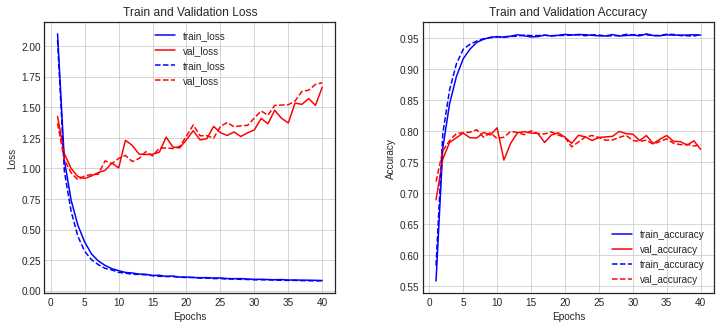

In [ ]:
diff_history(history, he_history)

**Batch Normalization**

배치 정규화는 모델에 입력되는 샘플들을 균일하게 만드는 방법으로 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미합니다.

보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고, 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줍니다. 또한, 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행합니다.

배치 정규화는 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 Dense 레이어 이후, 활성화 함수 이전에 활용됩니다.

**모델 구성 및 컴파일**

Reuters 데이터셋에 대해 뉴스 주제를 분류하는 딥러닝 모델에서 기존에 정의했던 3개의 Dense 레이어 사이에 배치 정규화를 위해 BatchNormalization() 레이어를 추가합니다. 다만 일반적으로 Dense 레이어와 Activation 활성함수 레이어 사이에 추가해야 합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [ ]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 49ms/step - loss: 1.7439 - accuracy: 0.6561 - val_loss: 3.3316 - val_accuracy: 0.7395
Epoch 2/40
18/18 [==============================] - 0s 20ms/step - loss: 0.6391 - accuracy: 0.8830 - val_loss: 3.1101 - val_accuracy: 0.7444
Epoch 3/40
18/18 [==============================] - 0s 20ms/step - loss: 0.3509 - accuracy: 0.9315 - val_loss: 2.7780 - val_accuracy: 0.7351
Epoch 4/40
18/18 [==============================] - 0s 20ms/step - loss: 0.2309 - accuracy: 0.9467 - val_loss: 2.4489 - val_accuracy: 0.7102
Epoch 5/40
18/18 [==============================] - 0s 19ms/step - loss: 0.1807 - accuracy: 0.9498 - val_loss: 2.1235 - val_accuracy: 0.7119
Epoch 6/40
18/18 [==============================] - 0s 20ms/step - loss: 0.1535 - accuracy: 0.9521 - val_loss: 1.8097 - val_accuracy: 0.7337
Epoch 7/40
18/18 [==============================] - 0s 20ms/step - loss: 0.1373 - accuracy: 0.9515 - val_loss: 1.5714 - val_accuracy: 0.7297
Epoch 8/40
18

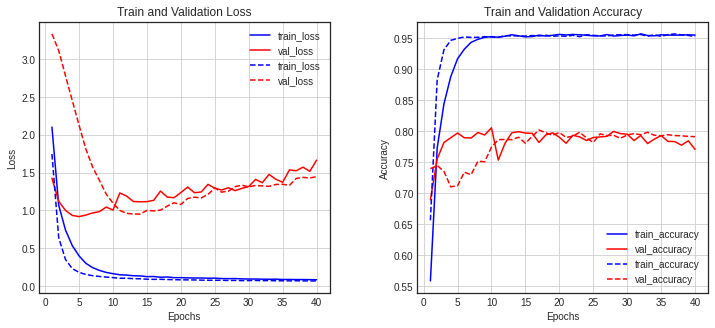

In [ ]:
diff_history(history, batch_norm_history)